In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
rcParams['figure.figsize']=(12,6)
rcParams['font.size']=18
rcParams['xtick.major.pad'] = 8

In [2]:
import kid_readout.analysis.process_mmw_response
from kid_readout.analysis.process_mmw_response import MmwResponse

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
mmws = [MmwResponse('/data/readout/2015-09-09_105652_mmw_frequency_sweep.nc',k) for k in range(16)]

/home/gjones/kid_readout/kid_readout/analysis/resonator.py:83: UserWarning: warning: inverse not yet defined for bifurcation model, proceeding anyway
  warnings.warn("warning: inverse not yet defined for bifurcation model, proceeding anyway")


# Response with mmw-source attenuators set to 6,6 turns 

##Raw response in ppm vs. mmw frequency

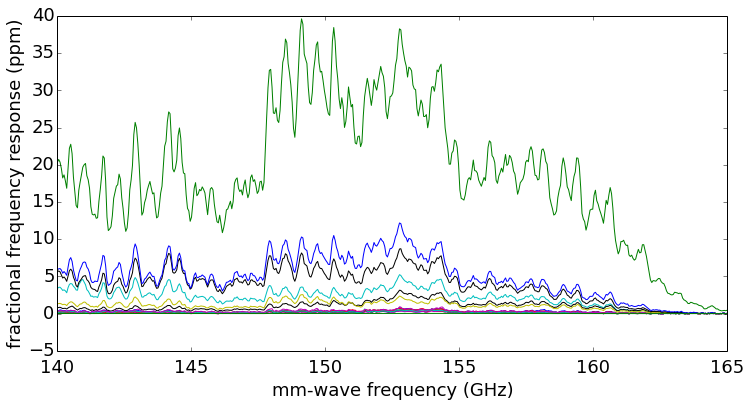

In [30]:
for mmw in mmws:
    plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response*1e6)
xlabel('mm-wave frequency (GHz)')
ylabel('fractional frequency response (ppm)')

## Same data, normalized to light detector

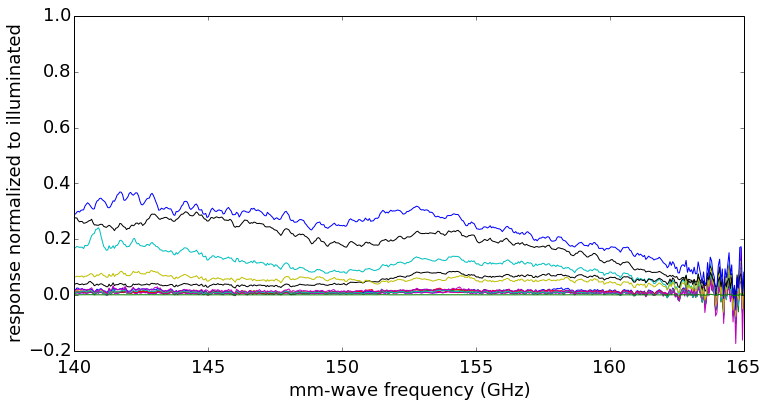

In [31]:
for mmw in mmws:
    plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response/mmws[1].mmw_frac_response)
xlabel('mm-wave frequency (GHz)')
ylabel('response normalized to illuminated')

## Same data in dB

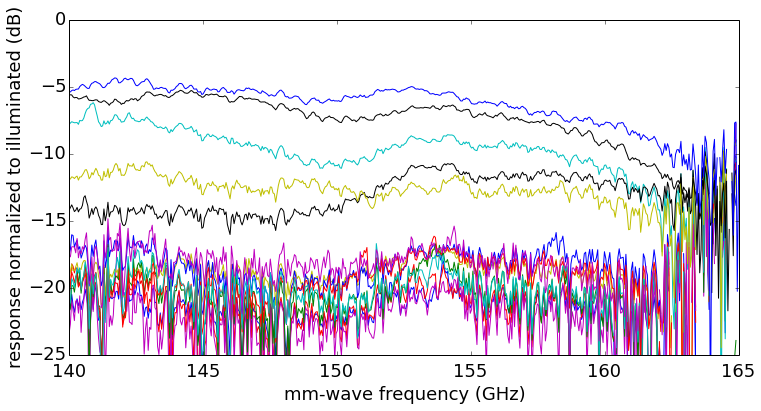

In [32]:
for mmw in mmws:
    plot(mmw.mmw_freq/1e9,10*np.log10(mmw.mmw_frac_response/mmws[1].mmw_frac_response))
ylim(-25,0)
xlabel('mm-wave frequency (GHz)')
ylabel('response normalized to illuminated (dB)')

# Now with lower mm-wave power (7,7 turns attenuators)

In [16]:
mmws2 = [MmwResponse('/data/readout/2015-09-09_113608_mmw_frequency_sweep.nc',k) for k in range(16)]

##Raw response in ppm vs. mmw frequency

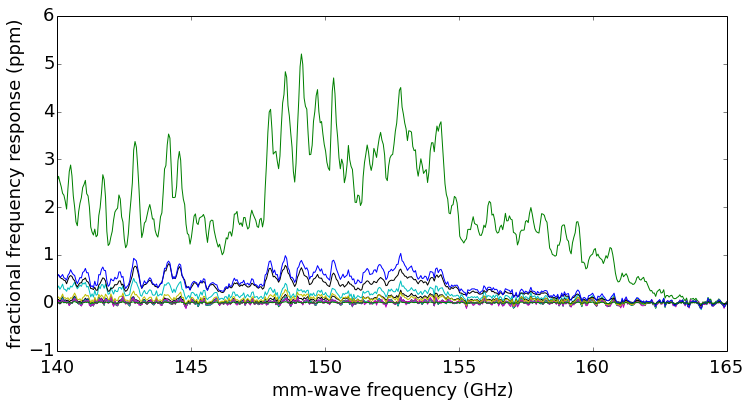

In [33]:
for mmw in mmws2:
    plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response*1e6)
xlabel('mm-wave frequency (GHz)')
ylabel('fractional frequency response (ppm)')

## Same data normalized to light detector, in dB

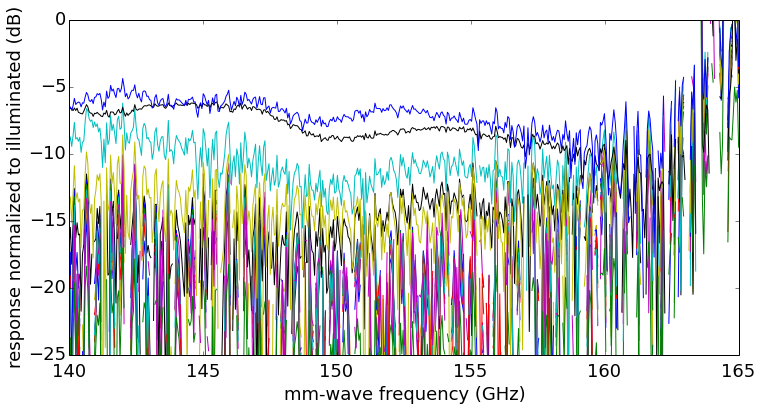

In [34]:
for mmw in mmws2:
    plot(mmw.mmw_freq/1e9,10*np.log10(mmw.mmw_frac_response/mmws2[1].mmw_frac_response))
ylim(-25,0)
xlabel('mm-wave frequency (GHz)')
ylabel('response normalized to illuminated (dB)')

## Check the ratio of response for the two attenuator settings

### Only plotting the four detectors with reasonable signal to noise in this plot
### As you can see, there is about 10 dB difference in power for the two settings

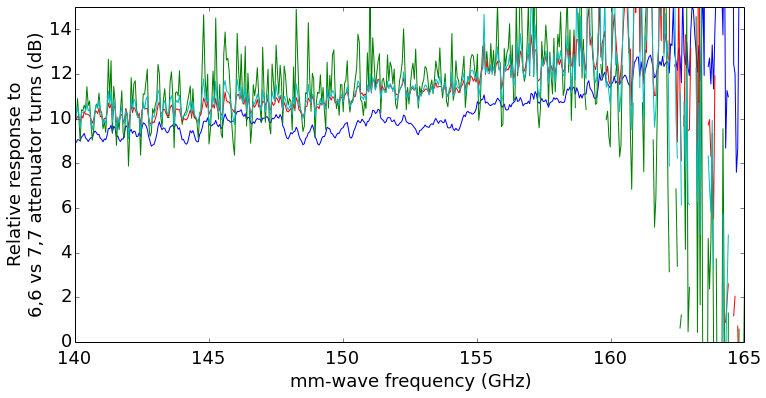

In [57]:
for k in [1,3,13,14]:
    plot(mmw.mmw_freq/1e9,10*np.log10(mmws[k].mmw_frac_response/mmws2[k].mmw_frac_response))
ylim(0,15)
ylabel('Relative response to\n6,6 vs 7,7 attenuator turns (dB)')
xlabel('mm-wave frequency (GHz)')